In [1]:
import sys
import os
import glob
print(sys.version_info)
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import collections

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,classification_report

sys.version_info(major=3, minor=8, micro=5, releaselevel='final', serial=0)


In [54]:
import glob
print("Current Directory:" + os.getcwd())
# file_pattern = '*_flows.txt' # Use all pcap files
file_pattern = '18-10-20_flows.txt' #'faf-exercise_flows.txt'
glob_path = os.path.join(os.getcwd(), 'attack/tran', file_pattern)
file_list = glob.glob(glob_path)

li = []
for filepath in file_list:
    df = pd.read_csv(filepath, index_col=None, header=0, delimiter='\t')
    li.append(df)

attack_flows = pd.concat(li, axis=0, ignore_index=True)
attack_flows.shape


Current Directory:C:\Users\hitman\iot-traffic-analysis


(23306, 106)

In [5]:
#timing_threshold = 0.01 * 200

in_attack_window =  (attack_flows['duration'] >= 1)
attack_flows[in_attack_window]

,%dir,flowInd,flowStat,timeFirst,timeLast,duration,numHdrDesc,numHdrs,hdrDesc,srcMac,...,icmpTCcnt,icmpBFTypH_TypL_Code,icmpTmGtw,icmpEchoSuccRatio,icmpPFindex,connSip,connDip,connSipDip,connSipDprt,connF
18,A,11,0x0400000000004000,1.258562e+09,1.258563e+09,31.428539,1,3,eth:ipv4:tcp,00:0b:db:4f:6b:10,...,0,0x00000000_0x00000000_0x0000,0x00000000,0,0,1,1,4,4,4
19,B,11,0x0400000000004001,1.258562e+09,1.258563e+09,31.387594,1,3,eth:ipv4:tcp,00:19:e3:e7:5d:23,...,0,0x00000000_0x00000000_0x0000,0x00000000,0,0,1,1,3,3,3
20,A,10,0x0400000000004000,1.258562e+09,1.258563e+09,41.884228,1,3,eth:ipv4:tcp,00:0b:db:4f:6b:10,...,0,0x00000000_0x00000000_0x0000,0x00000000,0,0,1,1,2,2,2
21,B,10,0x0400000000004001,1.258562e+09,1.258563e+09,41.899273,1,3,eth:ipv4:tcp,00:19:e3:e7:5d:23,...,0,0x00000000_0x00000000_0x0000,0x00000000,0,0,1,1,1,1,1
22,A,12,0x0400000000004000,1.258564e+09,1.258564e+09,2.652341,1,3,eth:ipv4:tcp,00:0b:db:63:5b:d4,...,0,0x00000000_0x00000000_0x0000,0x00000000,0,0,1,1,2,2,2
23,B,12,0x0400000000004001,1.258564e+09,1.258564e+09,2.652336,1,3,eth:ipv4:tcp,00:19:e3:e7:5d:23,...,0,0x00000000_0x00000000_0x0000,0x00000000,0,0,1,1,1,1,1
28,A,15,0x0400000000004000,1.258566e+09,1.258566e+09,1.596499,1,3,eth:ipv4:tcp,00:08:74:38:01:b4,...,0,0x00000000_0x00000000_0x0000,0x00000000,0,0,1,1,2,2,2
29,B,15,0x0400000000004001,1.258566e+09,1.258566e+09,1.596484,1,3,eth:ipv4:tcp,00:19:e3:e7:5d:23,...,0,0x00000000_0x00000000_0x0000,0x00000000,0,0,1,1,1,1,1
36,A,19,0x0400000000004000,1.258567e+09,1.258567e+09,4.191108,1,3,eth:ipv4:tcp,00:0b:db:63:58:a6,...,0,0x00000000_0x00000000_0x0000,0x00000000,0,0,1,1,2,2,2
37,B,19,0x0400000000004001,1.258567e+09,1.258567e+09,4.191084,1,3,eth:ipv4:tcp,00:19:e3:e7:5d:23,...,0,0x00000000_0x00000000_0x0000,0x00000000,0,0,1,1,1,1,1


In [23]:
# Features which will not be used
pointless_features = ['timeFirst', 'timeLast', 'dstPort', 'srcPort', 'dstIP', 
                      'dstMac', 'srcIP', 'srcMac', 'srcMac_dstMac_numP']

# Non-decimal features categorized by data-type
hex_features = ['flowStat', 'tcpFStat', 'ipTOS', 'ipFlags', 'ethType',
                 'tcpStates', 'icmpStat', 'icmpTmGtw', 'macStat','tcpAnomaly', 
                'tcpFlags',  'tcpMPF', 'tcpMPTBF', 'tcpMPdssF', 'tcpOptions']


string_features = ['%dir', 'hdrDesc', 'srcManuf_dstManuf', 'dstPortClass', 
                   'srcIPCC', 'dstIPCC', 'dstIPOrg', 'srcIPOrg']

# Not sure what to make of these - more research required
underscore_features = ['ethVlanID','ipOptCpCl_Num', 'icmpBFTypH_TypL_Code', 'ip6OptHH_D', 'ip6OptCntHH_D']

# Features we will use
features = ['flowInd', 'duration', 'numHdrDesc', 'numHdrs',
             'l4Proto', 'macPairs', 'dstPortClassN', 'numPktsSnt', 'numPktsRcvd',
            'numBytesSnt', 'numBytesRcvd', 'minPktSz', 'maxPktSz', 'avePktSize', 'stdPktSize', 'pktps', 'bytps',
            'pktAsm', 'bytAsm', 'ipMindIPID', 'ipMaxdIPID', 'ipMinTTL', 'ipMaxTTL', 'ipTTLChg', 'ipOptCnt',
            'tcpPSeqCnt', 'tcpSeqSntBytes', 'tcpSeqFaultCnt', 'tcpPAckCnt', 'tcpFlwLssAckRcvdBytes', 'tcpAckFaultCnt',
            'tcpInitWinSz', 'tcpAveWinSz', 'tcpMinWinSz', 'tcpMaxWinSz', 'tcpWinSzDwnCnt', 'tcpWinSzUpCnt',
            'tcpWinSzChgDirCnt', 'tcpOptPktCnt', 'tcpOptCnt', 'tcpMSS', 'tcpWS', 'tcpTmS', 'tcpTmER', 'tcpEcI',
            'tcpBtm', 'tcpSSASAATrip', 'tcpRTTAckTripMin', 'tcpRTTAckTripMax', 'tcpRTTAckTripAve',
            'tcpRTTAckTripJitAve', 'tcpRTTSseqAA', 'tcpRTTAckJitAve', 'icmpTCcnt', 'icmpEchoSuccRatio', 'icmpPFindex',
            'connSip', 'connDip', 'connSipDip', 'connSipDprt', 'connF',  'aveIAT', 'maxIAT', 
                'minIAT', 'stdIAT', 'tcpISeqN', 'tcpMPAID', 'tcpUtm', 'tcpWinSzThRt']

unused_features = pointless_features + hex_features + string_features + underscore_features
all_features = features + unused_features

attack_flows[features]

,flowInd,duration,numHdrDesc,numHdrs,l4Proto,macPairs,dstPortClassN,numPktsSnt,numPktsRcvd,numBytesSnt,...,connSipDprt,connF,aveIAT,maxIAT,minIAT,stdIAT,tcpISeqN,tcpMPAID,tcpUtm,tcpWinSzThRt
0,18,8.909379,1,3,6,1,3478,9,5,204,...,4,2.000000,0.989931,6.013363,0,1.455825,1897194946,0,1.509605e+06,0.0
1,18,2.685848,1,3,6,1,3478,5,9,280,...,3,3.000000,0.537170,2.231046,0,0.761713,45749223,0,3.862592e+06,0.0
2,44,0.012067,1,3,6,1,49152,7,6,338,...,2,0.666667,0.001724,0.004473,0,0.001364,3300748394,0,5.095339e+05,0.0
3,44,0.012861,1,3,6,1,49152,6,7,193,...,1,1.000000,0.002144,0.005609,0,0.001410,1934185800,0,1.509613e+06,0.0
4,42,6.117217,1,3,6,1,3478,10,6,360,...,4,2.000000,0.611722,3.007192,0,0.788433,1934555844,0,1.509616e+06,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23301,36,86370.728567,1,2,0,1,0,11497,11497,1138203,...,0,0.000000,7.512464,60.253470,0,11.566640,0,0,0.000000e+00,0.0
23302,36,86371.256296,1,2,0,1,0,11497,11497,1391137,...,0,0.000000,7.512503,60.481090,0,11.715870,0,0,0.000000e+00,0.0
23303,14804,158.049690,1,2,0,1,0,28,0,84,...,0,0.000000,5.644632,8.012778,0,1.322399,0,0,0.000000e+00,0.0
23304,31,86379.592900,1,3,6,1,443,17578,17637,1352436,...,2,2.000000,4.914070,10.231480,0,4.731625,16186171,0,0.000000e+00,0.0


In [27]:
from sklearn.preprocessing import StandardScaler
x = attack_flows.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features
np.mean(x),np.std(x)

(1.5111218211516985e-18, 0.970581776826274)

In [38]:
from sklearn.decomposition import PCA
pca_attack = PCA(n_components=2)
principalComponents_attack = pca_attack.fit_transform(x)

principal_attack_Df = pd.DataFrame(data = principalComponents_attack
             , columns = ['principal component 1', 'principal component 2'])
principal_attack_Df.tail()

,principal component 1,principal component 2
23301,-2.885261,6.289212
23302,-2.910972,6.027900
23303,-3.383290,2.137114
23304,3.202449,11.996315
23305,8.947063,21.256651


In [39]:
print('Explained variation per principal component: {}'.format(pca_attack.explained_variance_ratio_))

Explained variation per principal component: [0.1471653  0.07647721]


(23306, 106)
(2, 69)


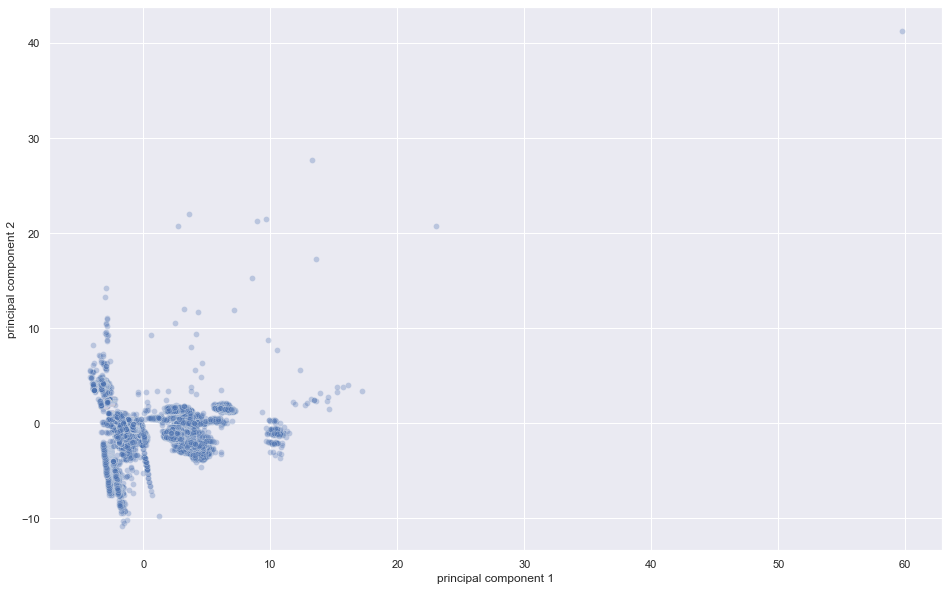

In [56]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    palette=sns.color_palette("hls", 10),
    data=principal_attack_Df,
    legend="full",
    alpha=0.3
)